In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow_hub as hub

In [49]:
import PIL
import cv2
import os
import requests

# Importing mobilnet V2 model from tensorflow hub

In [5]:
shape=(224,224)

mobilnet_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5",input_shape=shape+(3,))
])

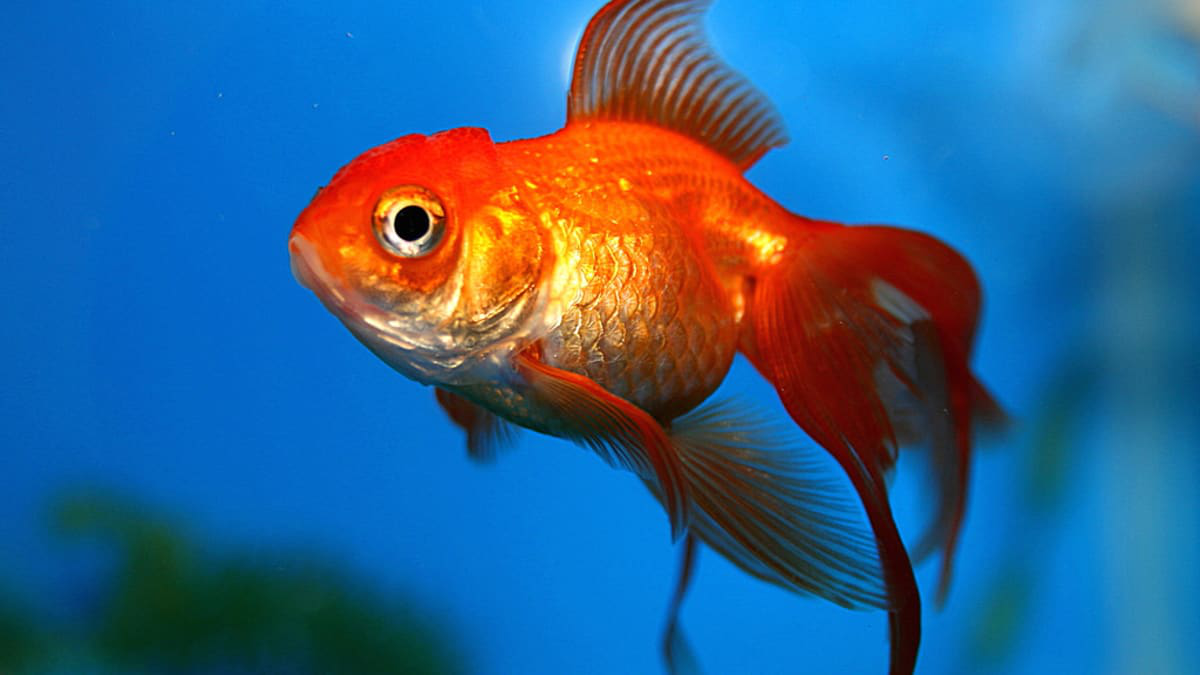

In [15]:
image=PIL.Image.open('goldfish.jpg')
image

In [16]:
image.size

(1200, 675)

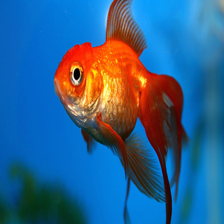

In [17]:
#Resizing the image
resized_image=image.resize((224,224))
resized_image

In [18]:
image_array=np.array(resized_image)
image_array

array([[[  5,  96, 185],
        [  4,  95, 184],
        [  4,  95, 184],
        ...,
        [149, 163, 162],
        [159, 166, 160],
        [166, 168, 158]],

       [[  5,  96, 185],
        [  5,  96, 185],
        [  5,  96, 185],
        ...,
        [147, 161, 160],
        [157, 165, 159],
        [165, 167, 157]],

       [[  5,  96, 185],
        [  6,  97, 186],
        [  6,  97, 186],
        ...,
        [145, 161, 159],
        [155, 165, 158],
        [162, 167, 156]],

       ...,

       [[ 14,  57,  37],
        [ 13,  58,  39],
        [ 11,  58,  40],
        ...,
        [ 22, 126, 174],
        [ 18, 124, 176],
        [ 15, 121, 177]],

       [[ 17,  59,  40],
        [ 15,  60,  42],
        [ 12,  59,  43],
        ...,
        [ 23, 128, 175],
        [ 19, 125, 176],
        [ 15, 121, 177]],

       [[ 21,  58,  43],
        [ 15,  62,  44],
        [ 14,  62,  46],
        ...,
        [ 23, 128, 173],
        [ 19, 125, 177],
        [ 16, 122, 179]]

# Scaling the values between 0 and 1

In [19]:
image_array=image_array/255
image_array

array([[[0.01960784, 0.37647059, 0.7254902 ],
        [0.01568627, 0.37254902, 0.72156863],
        [0.01568627, 0.37254902, 0.72156863],
        ...,
        [0.58431373, 0.63921569, 0.63529412],
        [0.62352941, 0.65098039, 0.62745098],
        [0.65098039, 0.65882353, 0.61960784]],

       [[0.01960784, 0.37647059, 0.7254902 ],
        [0.01960784, 0.37647059, 0.7254902 ],
        [0.01960784, 0.37647059, 0.7254902 ],
        ...,
        [0.57647059, 0.63137255, 0.62745098],
        [0.61568627, 0.64705882, 0.62352941],
        [0.64705882, 0.65490196, 0.61568627]],

       [[0.01960784, 0.37647059, 0.7254902 ],
        [0.02352941, 0.38039216, 0.72941176],
        [0.02352941, 0.38039216, 0.72941176],
        ...,
        [0.56862745, 0.63137255, 0.62352941],
        [0.60784314, 0.64705882, 0.61960784],
        [0.63529412, 0.65490196, 0.61176471]],

       ...,

       [[0.05490196, 0.22352941, 0.14509804],
        [0.05098039, 0.22745098, 0.15294118],
        [0.04313725, 0

In [22]:
image_array.shape

(224, 224, 3)

In [23]:
image_array=image_array[np.newaxis,...]
image_array.shape

(1, 224, 224, 3)

# Making some predictions

In [25]:
prediction=mobilnet_model.predict(image_array)
prediction

array([[ 0.12313658,  1.069602  ,  8.815402  , ..., -1.2934314 ,
        -0.7309963 ,  1.4857055 ]], dtype=float32)

In [27]:
predicted_value=np.argmax(prediction)
predicted_value

2

In [29]:
with open ('ImageNetLabels.txt','r') as f:
    labels=f.read().splitlines()

labels

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

In [31]:
predicted_image=labels[predicted_value]
predicted_image

'goldfish'

# Lets make a function of above whole procedure so that we dont need to repeat above steps

In [53]:
def predict_image(url):
    #importing url into image
    image=PIL.Image.open(requests.get(url, stream=True).raw)
    #Resizing the image
    resized_image=image.resize((224,224))
    #Converting image into array
    image_array=np.array(resized_image)
    #Scaling array between 0 and 1
    image_array=image_array/255
    #Reshaping array
    image_array=image_array[np.newaxis,...]
    #Predicting the image
    prediction=mobilnet_model.predict(image_array)
    predicted_value=np.argmax(prediction)
    #Finding the name of object in image
    with open ('ImageNetLabels.txt','r') as f:
        labels=f.read().splitlines()
    predicted_image=labels[predicted_value]
    return predicted_image

In [58]:
image_url='https://cdn.luxe.digital/media/2020/12/15110747/fastest-cars-world-2021-luxe-digital%402x.jpg'

In [59]:
predict_image(image_url)

'sports car'